# NLP 101

In [2]:
!pip install textblob nltk seaborn pandas

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
# import packages
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import cmudict
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re
from textblob import TextBlob
import string
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grooney\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grooney\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\grooney\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grooney\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# check our working directory
os.getcwd()

'C:\\Users\\grooney\\Desktop\\Initiatives\\AU\\nlp_101'

In [ ]:
#set our working directory to where our files are located
##os.chdir('C:\\PATH\\PATH\\PATH\\')

## Yelp Reviews

In [5]:
%ls

 Volume in drive C is OSDisk
 Volume Serial Number is 0669-F93C

 Directory of C:\Users\grooney\Desktop\Initiatives\AU\nlp_101

07/24/2020  12:39 PM    <DIR>          .
07/24/2020  12:39 PM    <DIR>          ..
07/24/2020  06:36 AM    <DIR>          .ipynb_checkpoints
04/30/2019  02:54 PM             2,048 literature.csv
07/24/2020  12:39 PM            28,714 NLP 101.ipynb
07/24/2020  06:25 AM        10,750,489 NLP 101.pptx
07/24/2020  06:36 AM            25,693 NLP 101-key.ipynb
04/30/2019  02:54 PM         1,606,396 yelp.csv
               5 File(s)     12,413,340 bytes
               3 Dir(s)  254,526,062,592 bytes free


In [6]:
# create dataframe from Yelp reviews file
df = pd.read_csv('yelp.csv')

In [7]:
# inspect the file
print(df.describe())
print(df.columns)

             stars         cool       useful        funny
count  2000.000000  2000.000000  2000.000000  2000.000000
mean      3.774000     0.908000     1.443000     0.747500
std       1.229504     2.021529     2.319793     2.143138
min       1.000000     0.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000     0.000000
50%       4.000000     0.000000     1.000000     0.000000
75%       5.000000     1.000000     2.000000     1.000000
max       5.000000    28.000000    28.000000    39.000000
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [8]:
# select column with the review text from dataframe and turn into a list
corpora = df['text'].tolist()

In [10]:
# view the first review
print(corpora[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [11]:
corpora[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [12]:
# set exhibit to the first review
exhibit = corpora[0]

### Pre-processing: Cleaning

In [13]:
# lower case
docClean = " ".join(x.lower() for x in exhibit.split())
docClean

'my wife took me here on my birthday for breakfast and it was excellent. the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. our waitress was excellent and our food arrived quickly on the semi-busy saturday morning. it looked like the place fills up pretty quickly so the earlier you get here the better. do yourself a favor and get their bloody mary. it was phenomenal and simply the best i\'ve ever had. i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it. it was amazing. while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. it was the best "toast" i\'ve ever had. anyway, i can\'t wait to go back!'

In [14]:
# remove numbers
docClean = re.sub('[0-9]', '', docClean).strip()
docClean



'my wife took me here on my birthday for breakfast and it was excellent. the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. our waitress was excellent and our food arrived quickly on the semi-busy saturday morning. it looked like the place fills up pretty quickly so the earlier you get here the better. do yourself a favor and get their bloody mary. it was phenomenal and simply the best i\'ve ever had. i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it. it was amazing. while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete. it was the best "toast" i\'ve ever had. anyway, i can\'t wait to go back!'

In [15]:
docClean = re.sub('  ', ' ', docClean).strip()
docClean

'my wife took me here on my birthday for breakfast and it was excellent. the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. our waitress was excellent and our food arrived quickly on the semi-busy saturday morning. it looked like the place fills up pretty quickly so the earlier you get here the better. do yourself a favor and get their bloody mary. it was phenomenal and simply the best i\'ve ever had. i\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it. it was amazing. while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. it came with pieces of their griddled bread with was amazing and it absolutely made the meal complete. it was the best "toast" i\'ve ever had. anyway, i can\'t wait to go back!'

### Pre-processing: Contractions

In [16]:
contractions_dict = {'didn\'t': 'did not','don\'t': 'do not',
                     'wouldn\'t': 'would not', 'won\'t': 'will not',
                    'can\'t': 'cannot', 'i\'ve': 'i have', 'i\'m': 'i am'}
def expand_contractions(s, contractions_dict=contractions_dict):
    #import re
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    
    return contractions_re.sub(replace, s)

def replace(match):
    return contractions_dict[match.group(0)]

In [17]:
expand_contractions('won\'t')

'will not'

In [18]:
docClean = expand_contractions(docClean)

In [19]:
docClean

'my wife took me here on my birthday for breakfast and it was excellent. the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. our waitress was excellent and our food arrived quickly on the semi-busy saturday morning. it looked like the place fills up pretty quickly so the earlier you get here the better. do yourself a favor and get their bloody mary. it was phenomenal and simply the best i have ever had. i am pretty sure they only use ingredients from their garden and blend them fresh when you order it. it was amazing. while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. it came with pieces of their griddled bread with was amazing and it absolutely made the meal complete. it was the best "toast" i have ever had. anyway, i cannot wait to go back!'

### Pre-processing: Tokenization

In [20]:
#tokenize into sentences
#from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(docClean)
sentences[0:3]

['my wife took me here on my birthday for breakfast and it was excellent.',
 'the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.',
 'our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.']

In [21]:
#tokenize into words
#from nltk.tokenize import word_tokenize
words = word_tokenize(docClean)
words[:10]

['my',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast']

### Pre-processing: Stop Words

In [22]:
#from nltk.corpus import stopwords
stopWords = list(set(stopwords.words('english')))

In [23]:
stopWords[:10]

['couldn', 'no', 'few', 'some', 'an', 'am', 'be', 'should', 'his', 'd']

In [24]:
#customize stop word list
stopWords.append('food')

#remove stop words from text
cleanWords = [w for w in words if not w in stopWords]
cleanWords[0:5]

['wife', 'took', 'birthday', 'breakfast', 'excellent']

### Pre-processing: Special Characters & Punctuation

In [25]:
# special characters
cleanWords = [w for w in cleanWords if re.search('^[a-zA-Z]+', w)]
cleanWords[-5:]

['ever', 'anyway', 'wait', 'go', 'back']

In [26]:
# remove punctuation
#import string
cleanWords = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), cleanWords))
cleanWords[-5:]

['ever', 'anyway', 'wait', 'go', 'back']

### Checkpoint: Difference between Raw and Clean Words

In [28]:
pd.DataFrame({'rawWords': words[:20], 'cleanWords': cleanWords[:20]})

,rawWords,cleanWords
0,my,wife
1,wife,took
2,took,birthday
3,me,breakfast
4,here,excellent
5,on,weather
6,my,perfect
7,birthday,made
8,for,sitting
9,breakfast,outside


### Pre-processing 3: Stemming & Lemmatization

In [29]:
#establish stemmer
#from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
#stem words
stemmedWords = [stemmer.stem(w) for w in cleanWords]
pd.DataFrame({'cleanWords': cleanWords[:10], 'stemmedWords': stemmedWords[:10]})

,cleanWords,stemmedWords
0,wife,wife
1,took,took
2,birthday,birthday
3,breakfast,breakfast
4,excellent,excel
5,weather,weather
6,perfect,perfect
7,made,made
8,sitting,sit
9,outside,outsid


In [30]:
# lambda function to convert pos_tag output to lemmatizer.lemmatize-friendly input ('NN' -> 'n')
wnpos = lambda e: ('a' if e[0].lower() == 'j' else e[0].lower()) if e[0].lower() in ['n', 'r', 'v'] else 'n'
wnpos('NN')

'n'

In [31]:
#establish lemmatizer
#from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#lemmatize words
lemWords = [lemmatizer.lemmatize(w, wnpos(pos_tag(w.split())[0][1])) for w in cleanWords]

In [32]:
pd.DataFrame({'cleanWords': cleanWords[:10], 'stemmedWords': stemmedWords[:10], 'lemWords': lemWords[:10]})

,cleanWords,stemmedWords,lemWords
0,wife,wife,wife
1,took,took,take
2,birthday,birthday,birthday
3,breakfast,breakfast,breakfast
4,excellent,excel,excellent
5,weather,weather,weather
6,perfect,perfect,perfect
7,made,made,make
8,sitting,sit,sit
9,outside,outsid,outside


In [33]:
#function to apply all elements of text cleaning
def clean_text(document):
    #import statements
    #from nltk.tokenize import word_tokenize
    #from nltk.corpus import stopwords
    document = str(document)
    docClean = document.replace('\n', ' ').replace('\r', '')  ## Newline removal
    docClean = " ".join(x.lower() for x in docClean.split()) ## Lowercase
    docClean = expand_contractions(docClean) # expand contractions
    docClean = word_tokenize(docClean) #Tokenize
    docClean = [w for w in docClean if not w in stopWords] #Drop Stop words
    docClean = ' '.join([re.sub(r'\W+','',w) for w in docClean]) #Remove non alphanumeric chars
    docClean = re.sub('  ', ' ', docClean)
    
    return docClean.strip()

In [34]:
df['cleanText'] = df['text'].apply(clean_text)

### N-Grams

In [35]:
def ngrams(text, maxNGram):
    text = text.split(' ')
    output = []
    for i in range(len(text)-maxNGram+1):
        output.append(text[i:i+maxNGram])
    
    return [' '.join(x) for x in output]

def flat_list(x):
    return [item for sublist in x for item in sublist]

In [38]:
# create unigrams
df['unigrams'] = df['cleanText'].apply(lambda x: ngrams(x, 1))
# create bigrams
df['bigrams'] = df['cleanText'].apply(lambda x: ngrams(x, 2))
# create trigrams
df['trigrams'] = df['cleanText'].apply(lambda x: ngrams(x, 3))

In [37]:
pd.Series(flat_list(df['unigrams'].tolist())).value_counts()[1:10]

s         1936
place     1306
good      1282
great     1017
like       959
one        805
get        765
would      681
really     663
dtype: int64

In [41]:
pd.Series(flat_list(df['bigrams'].tolist())).value_counts()[0:20]

                    173
happy hour          133
go back             117
pretty good          83
really good          78
great place          70
first time           68
could nt             68
ice cream            64
next time            61
 s                   59
love place           57
great service        54
customer service     53
feel like            53
come back            50
last night           46
even though          45
s good               45
make sure            44
dtype: int64

In [40]:
pd.Series(flat_list(df['trigrams'].tolist())).value_counts()[1:10]

sweet potato fries     18
would go back          16
truth truth truth      16
wait go back           13
go back try            11
great happy hour       11
old town scottsdale    10
happy hour prices       9
one favorite places     9
dtype: int64

## Feature Engineering

### Sentiment

In [42]:
#calculates the sentiment, or polarity of a body of text
# Output: sentiment - polarity score, scaled (-1, 1), of a document (higher == more positive)
def get_sentiment(document):
    try:
        #from textblob import TextBlob
        #drop non-alpha, keep some punctuation in raw text
        document = re.sub('[^a-z0-0\.?!\',]', ' ', document.lower())
        blob = TextBlob(document.lower())
        sentiment = blob.sentiment.polarity
        
        return sentiment
    
    except:
        return None

In [44]:
teststring = '<> this is !!! a TEST ,111,,, string'
re.sub('[^a-z0-0\.?!\',]', ' ', teststring)

'   this is !!! a      ,   ,,, string'

In [45]:
#apply function to df to calculate sentiment
df['sentiment'] = df['text'].apply(get_sentiment)

In [46]:
df['sentiment'].describe()

count    2000.000000
mean        0.246857
std         0.207270
min        -1.000000
25%         0.127798
50%         0.231683
75%         0.357330
max         1.000000
Name: sentiment, dtype: float64

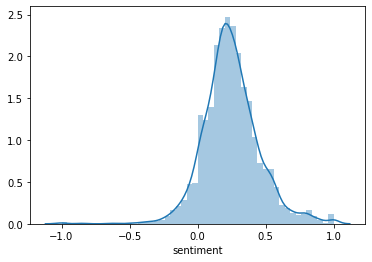

In [47]:
# visualize with a histogram
sns.distplot(df['sentiment'])

In [48]:
#Lowest sentiment statement
df.text[df.sentiment==min(df.sentiment)].iloc[0]

'This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!'

In [49]:
#Highest sentiment
df.text[df.sentiment==max(df.sentiment)].iloc[0]

'Our server Gary was awesome. Food was amazing...an experience.'

### Subjectivity

In [50]:
#calculates subjectivity, or modality, of a body of text
# Output: subjectivity - modality score, scaled (0, 1), of a document (higher == more subjective)
def get_subjectivity(document):
    #from textblob import TextBlob
    try:
        #drop non-alpha, keep some punctuation in raw text
        document = re.sub('[^a-z0-0\.?!\',]', ' ', document.lower())
        blob = TextBlob(document.lower())
        subjectivity = blob.sentiment.subjectivity
        
        return subjectivity
    
    except:
        return None

In [51]:
#apply function to df to calculate subjectivity
df['subjectivity'] = df.text.apply(get_subjectivity)

In [52]:
df['subjectivity'].describe()

count    2000.000000
mean        0.559130
std         0.123989
min         0.000000
25%         0.488889
50%         0.556667
75%         0.629412
max         1.000000
Name: subjectivity, dtype: float64

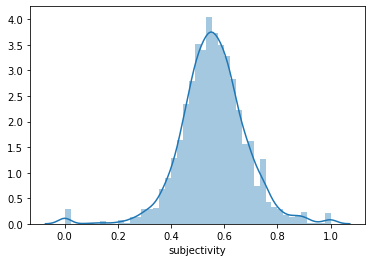

In [53]:
# visualize with a histogram
sns.distplot(df['subjectivity'])

In [54]:
df[['text', 'sentiment', 'subjectivity']].head()

,text,sentiment,subjectivity
0,My wife took me here on my birthday for breakf...,0.391667,0.646287
1,I have no idea why some people give bad review...,0.229773,0.638485
2,love the gyro plate. Rice is so good and I als...,0.600000,0.600000
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0.608646,0.700000
4,General Manager Scott Petello is a good egg!!!...,0.436806,0.788889


In [55]:
#Let's find the review with the lowest subjectivity
df.text[df.subjectivity==min(df.subjectivity)].iloc[0]

'This place is not there anymore.'

In [58]:
#Let's find the review with the lowest subjectivity
df.text[df.subjectivity==df.subjectivity.max()].iloc[0]

'Our server Gary was awesome. Food was amazing...an experience.'

#### Scatterplot of Sentiment v. Subjectivity

Text(0, 0.5, 'Subjectivity')

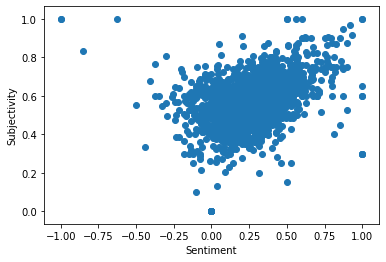

In [59]:
# visualize with a scatterplot
plt.scatter(df['sentiment'], df['subjectivity'])
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

## Readability

In [60]:
#functions to calculate number of syllables
#cmu dictionary
d = cmudict.dict()

#function to determine the number of syllables in a word with backup function if word not found in cmu dictionary
def nsyl(word):
    try:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]]
    except KeyError:
        #if word not found in cmudict
        return syllables(word)

#backup function to determine syllables if word not found in cmu dictionary
def syllables(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower()
    try:
        if word[0] in vowels:
            count +=1
        for index in range(1,len(word)):
            if word[index] in vowels and word[index-1] not in vowels:
                count +=1
        if word.endswith('e'):
            count -= 1
        if word.endswith('le'):
            count += 1
        if count == 0:
            count += 1
        return count
    except IndexError:
        return 0

In [61]:
#function to calculate total number of words
def total_words(document):
    #from nltk.tokenize import word_tokenize
    words = word_tokenize(document)
    return len(words)

#function to calculate total number of sentences
def total_sentences(document):
    #from nltk.tokenize import sent_tokenize
    sent = sent_tokenize(document)
    return len(sent)

In [62]:
# create column for total words
df['total_words'] = df['text'].apply(total_words)
# create column for total sentences
df['total_sentences'] = df['text'].apply(total_sentences)
# create column for total syllables
df['total_syllables'] = df['text'].apply(nsyl)

#### Flesch Reading Ease
206.835-1.015\*(total_words/total_sentences)-84.6*(total_syllables/total_words)

In [63]:
#calculate Flesch Reading Ease across the df
def FRES(document):
    try:
        numWord = total_words(document)
        numSent = total_sentences(document)
        numSyll = nsyl(document)
        x = (numWord / numSent)
        y = (numSyll / numWord)
        FRES = 206.835 - 1.015*(x) - 84.6*(y)
        return FRES
    except:
         return None

In [64]:
# apply FRES function
df['reading_ease'] = df.text.apply(FRES)

In [65]:
df['reading_ease'].describe()

count    2000.000000
mean       80.763519
std        14.559663
min      -129.025106
25%        73.730128
50%        80.976288
75%        88.623311
max       154.939643
Name: reading_ease, dtype: float64

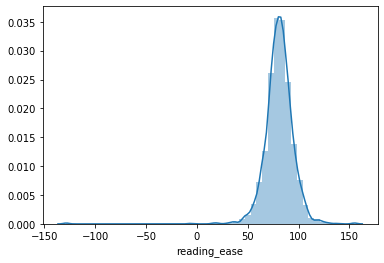

In [67]:
# visualize with histogram
sns.distplot(df['reading_ease'])

In [71]:
#Lowest reading ease
df.text[df.reading_ease==max(df.reading_ease)].iloc[0]

'LOVE the food!!!!'

#### Flesch-Kincaid Grade
.39*(total_words/total_sentences)+11.8*(total_syllables/total_words)-15.59

In [72]:
#calculate Flesch-Kincaid grade level across the df
def FKR(document):
    try:
        numWord = total_words(document)
        numSent = total_sentences(document)
        numSyll = nsyl(document)
        x = (numWord / numSent)
        y = (numSyll / numWord)
        FKR = .39*(x) + 11.8*(y) - 15.59
        return FKR
    except:
        return None

In [75]:
# apply FKR function
df['grade_level'] = df.text.apply(FKR)

In [76]:
df['grade_level'].describe()

count    2000.000000
mean        6.103638
std         3.934446
min        -7.482143
25%         4.247642
50%         5.931285
75%         7.598683
max        88.725389
Name: grade_level, dtype: float64

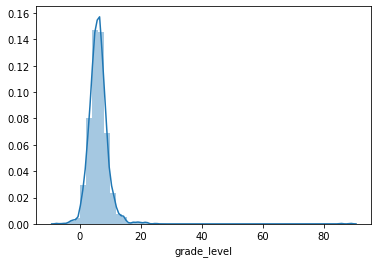

In [77]:
# visualize with histogram
sns.distplot(df['grade_level'])

# Exercises

Using the provided _Literature_ dataset, complete the below exercises to conduct an exploratory analysis.

## Exercise 1

In [ ]:
# Create a corpora and instantiate a Corpus class
dfLit = pd.read_csv('Literature.csv')
# Print the first document of the Corpus


In [ ]:
# how many words are in your corpus? (hint: print the words)


In [ ]:
# generate and print the clean text


In [ ]:
# print the bigrams of your corpus


## Exercise 2

Find the 10 top occuring words in your corpus and plot them

In [ ]:
# get the top words in the corpus


# get just the top 10 words and their counts


# create plot of these words and their counts


## Exercise 3

Return a sentiment score from each document

In [ ]:
# get sentiment scores for each document


In [ ]:
# plot the sentiment distribution of the documents in the corpus
